In [134]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

## Load series data

In [135]:
TrendData = pd.read_csv('C:\Users\Olu\Dropbox\File2\Careers\Olu\Cargill and Dow\July2015and 2016\WarwickAnalytics\Q2\TrendData.csv',
                       parse_dates=['Date'])

## Exploring the Trend Data

In [136]:
TrendData.shape

(3806, 2)

In [137]:
TrendData.head()

,Date,Value
0,2014-07-04,137209.0
1,2014-04-04,137639.0
2,2014-03-04,137876.0
3,2014-02-04,137795.0
4,2014-01-04,137623.0


In [138]:
TrendData = TrendData.set_index('Date')
TrendData.head()

,Value
Date,
2014-07-04,137209.0
2014-04-04,137639.0
2014-03-04,137876.0
2014-02-04,137795.0
2014-01-04,137623.0


##### Create a line chart showing Value by year

C:\Users\Olu\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


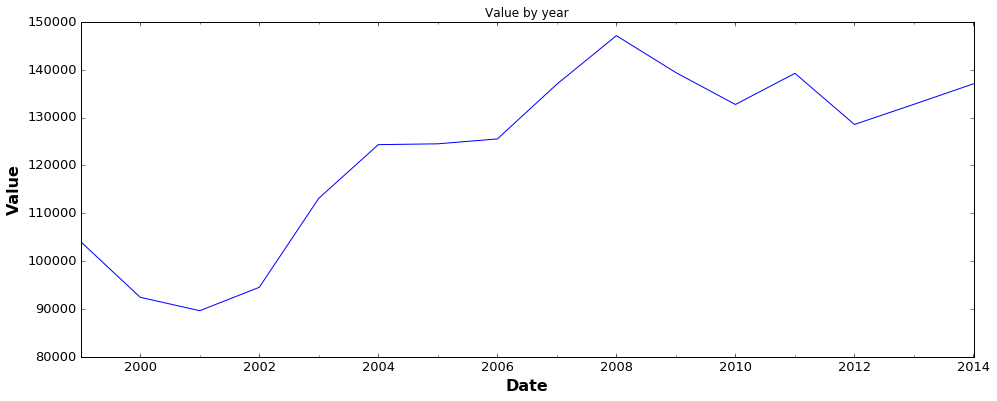

In [139]:
##### Create a line chart showing Value by year

#TrendData.resample('AS', how=['mean',np.min, np.max]).plot(title="Value by year")
Trend_plot = TrendData.resample('AS').plot(title="Value by year", figsize=(16,6),  legend=False)
Trend_plot.set_xlabel("Date", fontsize=16,fontweight='bold')
Trend_plot.set_ylabel("Value", fontsize=16,fontweight='bold')
plt.xticks(fontsize=13) 
plt.yticks(fontsize=13)
plt.savefig("trend_plot.png", dpi=600, bbox="tight")

The points of inflection in the trend chart above indicate changes in values, either positive or negative, coinciding with each year. Hence, yearly semnetation will be ideal for this trend data.

In [140]:
TrendData = TrendData.reset_index()
TrendData.head()

,Date,Value
0,2014-07-04,137209.0
1,2014-04-04,137639.0
2,2014-03-04,137876.0
3,2014-02-04,137795.0
4,2014-01-04,137623.0


## Segment Trend Data by Date based on trends in the values

In [141]:
##### Segment Trend Data by year since value changes correspond with changes per year

TrendData_df = TrendData.sort_values('Date').groupby(TrendData.Date.dt.year).agg(['first', 'last'])
TrendData_df.columns = ['StartDate','EndDate', 'StartValue','EndValue']
TrendData_df

,StartDate,EndDate,StartValue,EndValue
Date,,,,
1999,1999-01-10,1999-12-31,106967.0,100534.0
2000,2000-01-02,2000-12-29,97303.1,92998.8
2001,2001-01-01,2001-12-31,93723.3,88488.0
2002,2002-01-01,2002-12-31,88962.6,104624.0
2003,2003-01-01,2003-12-31,104928.0,125277.0
2004,2004-01-01,2004-12-31,125695.0,136269.0
2005,2005-01-02,2005-12-30,130344.0,118641.0
2006,2006-01-02,2006-12-29,121045.0,131361.0
2007,2007-01-01,2007-12-31,131758.0,146471.0


In [143]:
##### Save results to file
TrendData_df.to_csv('trend_segments.csv', index=False)